In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os, re

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '5,4м х5(1).txt',
 '5.4м x5.xlsx',
 '5.4м х5(2).txt',
 '5.4м х5(3).txt',
 'Metagenomics.ipynb',
 'OJIP.ipynb',
 'Задача №5 (4-6).xls']

In [92]:
raw_data = pd.read_excel('Задача №5 (4-6).xls')
raw_data.head()

,ASV,MSU-1,MSU-2,MSU-3,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,34,20406,7649,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
1,seq2,8239,3,2762,4126,0,0,Plastid
2,seq3,5457,9,2186,3595,0,0,Mitochondria
3,seq4,0,0,0,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
4,seq5,0,0,0,0,0,6753,Plastid


## Берем только свои пробы

In [93]:
raw_data = raw_data[['ASV', 'MSU-4', 'MSU-5', 'MSU-6', 'taxonomy']]
raw_data.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
1,seq2,4126,0,0,Plastid
2,seq3,3595,0,0,Mitochondria
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
4,seq5,0,0,6753,Plastid


## Убираем те таксоны, где во всех пробах 0, и Unclassified

In [94]:
raw_data = raw_data.loc[raw_data[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis = 1) != 0]
raw_data.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
1,seq2,4126,0,0,Plastid
2,seq3,3595,0,0,Mitochondria
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
4,seq5,0,0,6753,Plastid


In [95]:
data = raw_data.loc[raw_data.taxonomy != 'Unclassified']
data.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
1,seq2,4126,0,0,Plastid
2,seq3,3595,0,0,Mitochondria
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
4,seq5,0,0,6753,Plastid


## Убираем митохондрии, пластиды и viridiplantae

In [96]:
data = data[~data.taxonomy.str.contains('Mitochondria|Plastid|Viridiplantae')]
data.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...
7,seq8,798,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...
8,seq9,681,0,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...


## Создаём таблицу с процентами

In [97]:
for i, j in enumerate(data[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis = 0)):
    exec('sum_msu_{} = {}'.format(i + 4, j))

In [98]:
data_p = data.copy()
data_p['MSU-4'] = data_p['MSU-4']/sum_msu_4
data_p['MSU-5'] = data_p['MSU-5']/sum_msu_5
data_p['MSU-6'] = data_p['MSU-6']/sum_msu_6
data_p.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy
0,seq1,0.026089,0.000000,0.0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...
3,seq4,0.000000,0.429886,0.0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
5,seq6,0.000000,0.241262,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...
7,seq8,0.050903,0.000000,0.0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...
8,seq9,0.043439,0.000000,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...


In [133]:
data_p[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis=0)

MSU-4    1.0
MSU-5    1.0
MSU-6    1.0
dtype: float64

# Филумы

In [112]:
data['phylum'] = data.taxonomy.str.split(';').apply(lambda x: ', '.join(x[0:2]))
data.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria"
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria"
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"
7,seq8,798,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria"
8,seq9,681,0,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"


In [139]:
data_phylum = data.loc[~data.phylum.str.contains('unclassified', regex=True)]
data_phylum.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria"
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria"
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"
7,seq8,798,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria"
8,seq9,681,0,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"


In [140]:
for i, j in enumerate(data_phylum[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis = 0)):
    exec('phylum_sum_msu_{} = {}'.format(i + 4, j)) 

In [141]:
data_phylum

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria"
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria"
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"
7,seq8,798,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria"
8,seq9,681,0,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"
...,...,...,...,...,...,...
193,seq194,3,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria"
194,seq195,3,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Ca...,"Bacteria, Proteobacteria"
195,seq196,3,0,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria"
196,seq197,0,3,0,Bacteria;Bacteroidota;Bacteroidia;Sphingobacte...,"Bacteria, Bacteroidota"


In [142]:
data_phylum['MSU-4'] = data_phylum['MSU-4']/phylum_sum_msu_4
data_phylum['MSU-5'] = data_phylum['MSU-5']/phylum_sum_msu_5
data_phylum['MSU-6'] = data_phylum['MSU-6']/phylum_sum_msu_6
data_phylum.head()

<ipython-input-142-069996b2689a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_phylum['MSU-4'] = data_phylum['MSU-4']/phylum_sum_msu_4
<ipython-input-142-069996b2689a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_phylum['MSU-5'] = data_phylum['MSU-5']/phylum_sum_msu_5
<ipython-input-142-069996b2689a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum
0,seq1,0.026089,0.000000,0.0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria"
3,seq4,0.000000,0.429886,0.0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria"
5,seq6,0.000000,0.241262,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"
7,seq8,0.050903,0.000000,0.0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria"
8,seq9,0.043439,0.000000,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota"


In [143]:
# Проверка, если сумма во всех пробах 1.0, то огонь
data_phylum[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis=0)

MSU-4    1.0
MSU-5    1.0
MSU-6    1.0
dtype: float64

In [182]:
data_phylum = data_phylum.groupby('phylum').agg({'MSU-4':'sum', 'MSU-5':'sum', 'MSU-6':'sum'}).reset_index()

In [183]:
data_phylum

,phylum,MSU-4,MSU-5,MSU-6
0,"Bacteria, Actinobacteriota",0.046693,0.245674,0.052930
1,"Bacteria, Bacteroidota",0.447854,0.078894,0.308346
2,"Bacteria, Cyanobacteria",0.026089,0.000000,0.000000
3,"Bacteria, Firmicutes",0.002105,0.000000,0.015017
4,"Bacteria, Gemmatimonadota",0.005805,0.000000,0.000000
5,"Bacteria, Proteobacteria",0.471200,0.675433,0.623708
6,"Bacteria, Verrucomicrobiota",0.000255,0.000000,0.000000


In [186]:
data_phylum.phylum[~(data_phylum.iloc[:, 1:] > 0.05).any(axis = 1)] = 'Other'

<ipython-input-186-94437ca41159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_phylum.phylum[~(data_phylum.iloc[:, 1:] > 0.05).any(axis = 1)] = 'Other'


In [188]:
data_phylum = data_phylum.groupby('phylum').agg({'MSU-4':'sum', 'MSU-5':'sum', 'MSU-6':'sum'})
data_phylum

,MSU-4,MSU-5,MSU-6
phylum,,,
"Bacteria, Actinobacteriota",0.046693,0.245674,0.052930
"Bacteria, Bacteroidota",0.447854,0.078894,0.308346
"Bacteria, Proteobacteria",0.471200,0.675433,0.623708
Other,0.034254,0.000000,0.015017


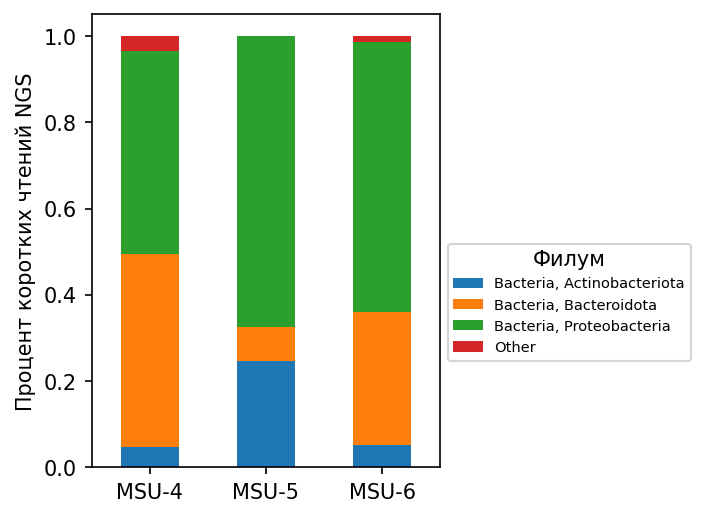

In [645]:
fig, ax = plt.subplots(figsize=(3, 4),dpi=150)
data_phylum.T.plot.bar(ax = ax, stacked=True, rot = False)
ax.legend(bbox_to_anchor=(1, 0.51),fontsize=7, title = 'Филум')
ax.set_ylabel('Процент коротких чтений NGS')
plt.savefig('phylum_diagram.png', dpi = 150, bbox_inches = 'tight')

In [191]:
data_phylum.astype(float)

,MSU-4,MSU-5,MSU-6
phylum,,,
"Bacteria, Actinobacteriota",0.046693,0.245674,0.052930
"Bacteria, Bacteroidota",0.447854,0.078894,0.308346
"Bacteria, Proteobacteria",0.471200,0.675433,0.623708
Other,0.034254,0.000000,0.015017


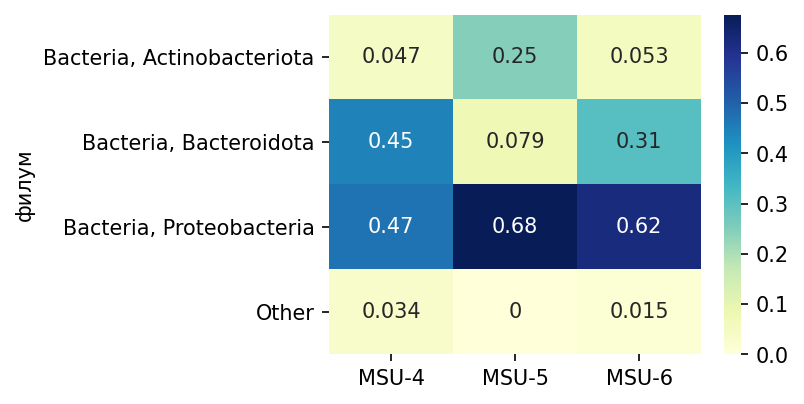

In [647]:
plt.figure(figsize=(4, 3), dpi=150)
sns.heatmap(data_phylum.astype(float), cmap="YlGnBu", annot = True)
plt.ylabel('филум')
# убрать viridiplantae, unclassified bacteria
# схлопнуть в others тех, кого очень мало во всех
plt.savefig('phylum_heatmap.png', dpi = 150, bbox_inches = 'tight')

# То же самое для family

In [212]:
data['family'] = data.taxonomy.str.split(';').apply(lambda x: ', '.join(x[4:5]))

In [652]:
data_family = data.loc[~data.family.str.contains('unclassified', regex=True)]
data_family = data_family.loc[data_family.family != '']
data_family.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum,family,genus
0,seq1,409,0,0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria",Cyanobiaceae,Cyanobium PCC-6307
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria",Pseudomonadaceae,Pseudomonas
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,Microbacterium
7,seq8,798,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria",Rhizobiaceae,unclassified_Rhizobiaceae
8,seq9,681,0,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,unclassified_Microbacteriaceae


In [653]:
for i, j in enumerate(data_family[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis = 0)):
    exec('family_sum_msu_{} = {}'.format(i + 4, j)) 

In [654]:
data_family['MSU-4'] = data_family['MSU-4']/family_sum_msu_4
data_family['MSU-5'] = data_family['MSU-5']/family_sum_msu_5
data_family['MSU-6'] = data_family['MSU-6']/family_sum_msu_6
data_family.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum,family,genus
0,seq1,0.026247,0.000000,0.0,Bacteria;Cyanobacteria;Cyanobacteriia;Synechoc...,"Bacteria, Cyanobacteria",Cyanobiaceae,Cyanobium PCC-6307
3,seq4,0.000000,0.429886,0.0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria",Pseudomonadaceae,Pseudomonas
5,seq6,0.000000,0.241262,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,Microbacterium
7,seq8,0.051210,0.000000,0.0,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,"Bacteria, Proteobacteria",Rhizobiaceae,unclassified_Rhizobiaceae
8,seq9,0.043701,0.000000,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,unclassified_Microbacteriaceae


In [655]:
# Проверка, если сумма во всех пробах 1.0, то огонь
data_family[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis=0)

MSU-4    1.0
MSU-5    1.0
MSU-6    1.0
dtype: float64

In [263]:
'' in data_family.family.unique()

False

In [656]:
data_family = data_family.groupby('family').agg({'MSU-4':'sum', 'MSU-5':'sum', 'MSU-6':'sum'}).reset_index()
data_family.head()

,family,MSU-4,MSU-5,MSU-6
0,Acetobacteraceae,0.000000,0.000000,0.003247
1,Alcaligenaceae,0.000000,0.000933,0.000000
2,Amoebophilaceae,0.000128,0.000000,0.015830
3,Azospirillaceae,0.003080,0.000000,0.000000
4,Beijerinckiaceae,0.011615,0.000000,0.004194


In [657]:
data_family.family[~(data_family.iloc[:, 1:] > 0.05).any(axis = 1)] = 'Other'

<ipython-input-657-abc59074821c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_family.family[~(data_family.iloc[:, 1:] > 0.05).any(axis = 1)] = 'Other'


In [658]:
data_family = data_family.groupby('family').agg({'MSU-4':'sum', 'MSU-5':'sum', 'MSU-6':'sum'})
data_family

,MSU-4,MSU-5,MSU-6
family,,,
Caulobacteraceae,0.097606,0.191339,0.065079
Comamonadaceae,0.012193,0.022056,0.199702
Devosiaceae,0.007765,0.000000,0.220538
Flavobacteriaceae,0.086440,0.078427,0.000000
Microbacteriaceae,0.043701,0.241262,0.001082
Other,0.080408,0.035926,0.144094
Pseudomonadaceae,0.000000,0.429886,0.002977
Reyranellaceae,0.003529,0.000000,0.060885
Rhizobiaceae,0.161330,0.000636,0.004330


In [660]:
data_family_other = data_family.loc[['Other'], :]
data_family = pd.concat([data_family_other, data_family.drop(index='Other')])

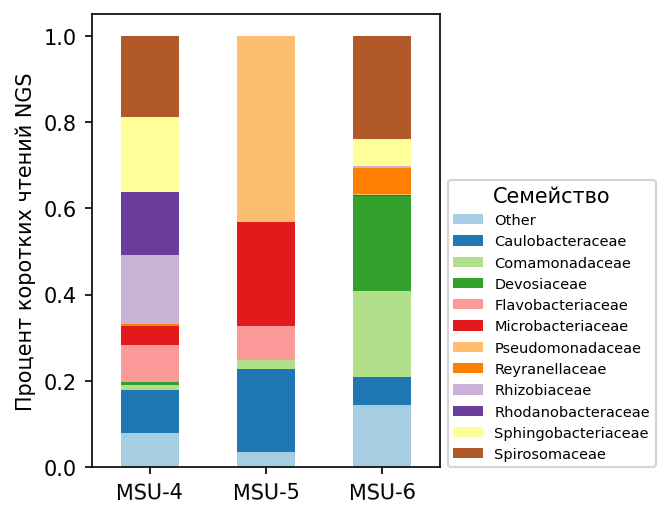

In [661]:

sns.color_palette("hls", len(data_family))
fig, ax = plt.subplots(figsize=(3, 4),dpi=150)
data_family.T.plot.bar(ax = ax, 
                       rot = True,
                       stacked=True, 
                       color = sns.color_palette("Paired"))
                       #color = ['grey'] + sns.color_palette("hls", len(data_family)-1))
ax.set_ylabel('Процент коротких чтений NGS')
ax.legend(bbox_to_anchor=(1, 0.65),fontsize=7, title = 'Семейство')
plt.savefig('family_diagram.png', dpi = 150, bbox_inches = 'tight')

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6548363636363637, 0.33999999999999997),
 (0.7815272727272726, 0.86, 0.33999999999999997),
 (0.4978909090909092, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.46574545454545463),
 (0.33999999999999997, 0.86, 0.7493818181818184),
 (0.33999999999999997, 0.6869818181818181, 0.86),
 (0.33999999999999997, 0.4033454545454544, 0.86),
 (0.560290909090909, 0.33999999999999997, 0.86),
 (0.8439272727272731, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.592436363636363),
 'grey']

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4),dpi=150)
data_family.T.plot.bar(ax = ax, stacked=True, rot = False,color = sns.color_palette("Paired"))
ax.legend(bbox_to_anchor=(1, 0.65),fontsize=7, title = 'Family')

,MSU-4,MSU-5,MSU-6
family,,,
Caulobacteraceae,0.097606,0.191339,0.065079
Comamonadaceae,0.012193,0.022056,0.199702
Devosiaceae,0.007765,0.000000,0.220538
Flavobacteriaceae,0.086440,0.078427,0.000000
Microbacteriaceae,0.043701,0.241262,0.001082
Pseudomonadaceae,0.000000,0.429886,0.002977
Reyranellaceae,0.003529,0.000000,0.060885
Rhizobiaceae,0.161330,0.000636,0.004330
Rhodanobacteraceae,0.144452,0.000000,0.000000


In [294]:
def swap_rows(df, i1, i2):
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

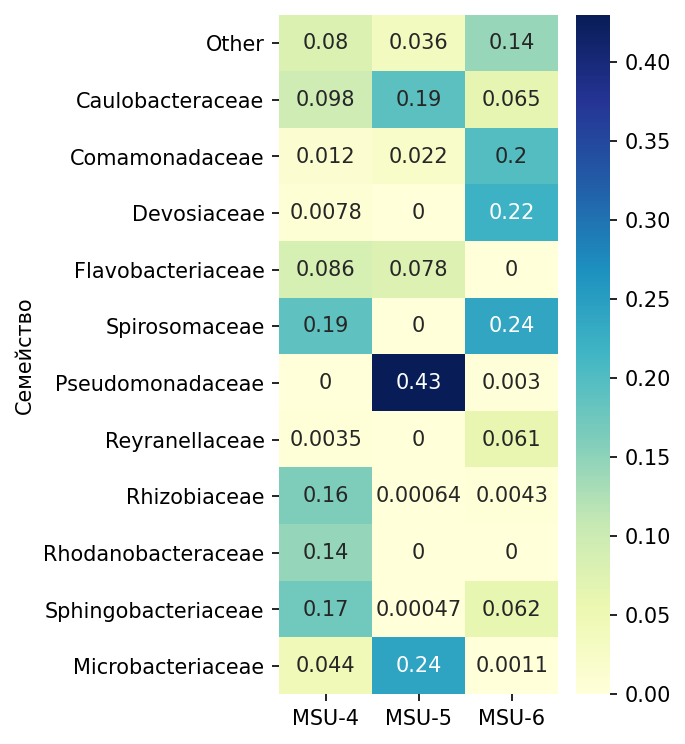

In [662]:
plt.figure(figsize=(3, 6), dpi=150)
sns.heatmap(swap_rows(data_family.reset_index(), 5, 11).set_index('family').astype(float), cmap="YlGnBu", annot = True)
plt.ylabel('Семейство')
plt.savefig('family_heatmap.png', dpi = 150, bbox_inches = 'tight')

MSU-4 - Spirosomaceae, Rhizobiaceae, Rhodanobacteriaceae, Sphingobacteriaceae - агробактерии, почва   
MSU-5 - Microbacteriaceae - почва, Pseudomonaceae - в воде, Caulobacteriaceae - почва ==> вода из лужи

# Индексы

Надо выделить роды

In [295]:
data['genus'] = data.taxonomy.str.split(';').apply(lambda x: ', '.join(x[5:6]))

In [308]:
data_genus = data.loc[~data.genus.str.contains('unclassified|PCC-6307', regex=True)]
data_genus = data_genus.loc[data_genus.genus != '']
data_genus.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum,family,genus
3,seq4,0,10135,0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria",Pseudomonadaceae,Pseudomonas
5,seq6,0,5688,0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,Microbacterium
10,seq11,9,0,0,Bacteria;Proteobacteria;Alphaproteobacteria;Ca...,"Bacteria, Proteobacteria",Caulobacteraceae,Brevundimonas
11,seq12,0,2388,0,Bacteria;Proteobacteria;Alphaproteobacteria;Ca...,"Bacteria, Proteobacteria",Caulobacteraceae,Brevundimonas
12,seq13,2332,0,0,Bacteria;Bacteroidota;Bacteroidia;Sphingobacte...,"Bacteria, Bacteroidota",Sphingobacteriaceae,Nubsella


In [309]:
for i, j in enumerate(data_genus[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis = 0)):
    exec('genus_sum_msu_{} = {}'.format(i + 4, j))
    
data_genus['MSU-4'] = data_genus['MSU-4']/genus_sum_msu_4
data_genus['MSU-5'] = data_genus['MSU-5']/genus_sum_msu_5
data_genus['MSU-6'] = data_genus['MSU-6']/genus_sum_msu_6
data_genus.head()

,ASV,MSU-4,MSU-5,MSU-6,taxonomy,phylum,family,genus
3,seq4,0.000000,0.454016,0.0,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,"Bacteria, Proteobacteria",Pseudomonadaceae,Pseudomonas
5,seq6,0.000000,0.254804,0.0,Bacteria;Actinobacteriota;Actinobacteria;Micro...,"Bacteria, Actinobacteriota",Microbacteriaceae,Microbacterium
10,seq11,0.000751,0.000000,0.0,Bacteria;Proteobacteria;Alphaproteobacteria;Ca...,"Bacteria, Proteobacteria",Caulobacteraceae,Brevundimonas
11,seq12,0.000000,0.106975,0.0,Bacteria;Proteobacteria;Alphaproteobacteria;Ca...,"Bacteria, Proteobacteria",Caulobacteraceae,Brevundimonas
12,seq13,0.194479,0.000000,0.0,Bacteria;Bacteroidota;Bacteroidia;Sphingobacte...,"Bacteria, Bacteroidota",Sphingobacteriaceae,Nubsella


In [310]:
data_genus[['MSU-4', 'MSU-5', 'MSU-6']].sum(axis=0)

MSU-4    1.0
MSU-5    1.0
MSU-6    1.0
dtype: float64

In [311]:
data_genus = data_genus.groupby('genus').agg({'MSU-4':'sum', 'MSU-5':'sum', 'MSU-6':'sum'}).reset_index()
data_genus.head()

,genus,MSU-4,MSU-5,MSU-6
0,Acinetobacter,0.000250,0.000000,0.002223
1,Allorhizobium-Neorhizobium-Pararhizobium-Rhizo...,0.059461,0.000672,0.000000
2,Azospirillum,0.004003,0.000000,0.000000
3,Bosea,0.014261,0.000000,0.004447
4,Brevibacillus,0.000000,0.000000,0.000855


In [605]:
data_genus['MSU-4'].loc[data_genus['MSU-4'] != 0].count()

40

In [617]:
index_table = pd.DataFrame({'Число ОТЕ':[], 'Индекс Шеннона':[], 'Индекс Симпсона':[], 'Обратный индекс Симспона':[]})
for probe in data_genus.set_index('genus'):
    shan = data_genus[probe].apply(lambda x: -x*np.log(x)).fillna(0).sum()
    simp = sum(data_genus[probe] ** 2)
    rev_simp = 1 - simp
    otu_count = data_genus[probe].loc[data_genus[probe] != 0].count()
    index_table  = index_table.append(pd.DataFrame({'Число ОТЕ':[int(otu_count)], 
                                                    'Индекс Шеннона':[round(shan,2)], 
                                                    'Индекс Симпсона':[round(simp, 2)], 
                                                    'Обратный индекс Симспона':[round(rev_simp, 2)],}, index = [probe]))

In [618]:
index_table.

,Число ОТЕ,Индекс Шеннона,Индекс Симпсона,Обратный индекс Симспона
MSU-4,40.0,2.22,0.14,0.86
MSU-5,10.0,1.28,0.32,0.68
MSU-6,25.0,2.08,0.19,0.81


In [347]:
data_genus.head()

,genus,MSU-4,MSU-5,MSU-6
0,Acinetobacter,0.000250,0.000000,0.002223
1,Allorhizobium-Neorhizobium-Pararhizobium-Rhizo...,0.059461,0.000672,0.000000
2,Azospirillum,0.004003,0.000000,0.000000
3,Bosea,0.014261,0.000000,0.004447
4,Brevibacillus,0.000000,0.000000,0.000855


In [351]:
2 * sum(data_genus['MSU-4'] * data_genus['MSU-5']) / (sum(data_genus['MSU-4'] ** 2) + sum(data_genus['MSU-5'] ** 2))

0.15201533079322077

In [370]:
MH_index_table = pd.DataFrame({'MSU-4':[0, 0, 0], 'MSU-5':[0, 0, 0], 'MSU-6':[0, 0, 0]}, index = ['MSU-4', 'MSU-5', 'MSU-6'])
for probe1 in data_genus.set_index('genus'):
    for probe2 in data_genus.set_index('genus'):
        MH_index = 2 * sum(data_genus[probe1] * data_genus[probe2]) / (sum(data_genus[probe1] ** 2) + sum(data_genus[probe2] ** 2))
        MH_index_table.loc[probe2, probe1] = MH_index

In [368]:
MH_index_table

,MSU-4,MSU-5,MSU-6
MSU-4,1.000000,0.152015,0.157300
MSU-5,0.152015,1.000000,0.071881
MSU-6,0.157300,0.071881,1.000000


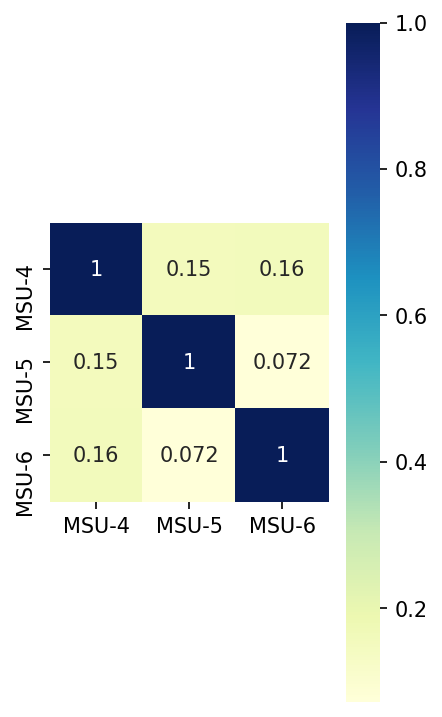

In [501]:
plt.figure(figsize=(3, 6), dpi=150)
sns.heatmap(MH_index_table.astype(float), cmap="YlGnBu", annot = True, square=True)

In [474]:
MH_index_table

,MSU-4,MSU-5,MSU-6
MSU-4,1.000000,0.152015,0.157300
MSU-5,0.152015,1.000000,0.071881
MSU-6,0.157300,0.071881,1.000000


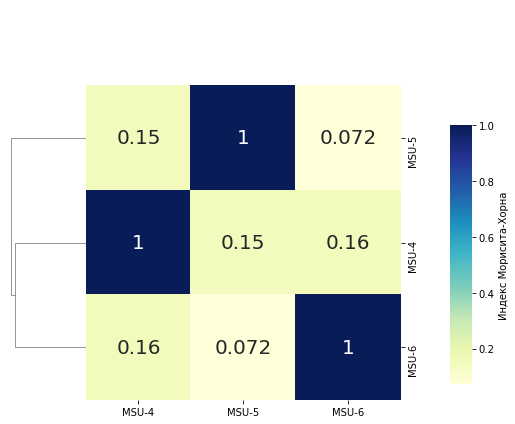

In [664]:
plot = sns.clustermap(MH_index_table.astype(float), 
               cmap="YlGnBu", 
               annot = True, 
               annot_kws = {'fontsize':20}, 
               col_cluster = False, 
               dendrogram_ratio = 0.2, 
               figsize = (6, 6),
               cbar_pos = (1.05, 0.1, 0.05, 0.6),
               cbar_kws = {'label':'Индекс Морисита-Хорна'}
               )
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',dpi=150, bbox_inches = 'tight')

# Диаграмма Вена

In [425]:
common = data_genus.loc[(data_genus.set_index('genus') != 0).reset_index().all(axis=1)].genus

In [619]:
common

6    Brevundimonas
Name: genus, dtype: object

In [430]:
set_msu_4 = set(data_genus['genus'].loc[data_genus['MSU-4'] != 0])
set_msu_5 = set(data_genus['genus'].loc[data_genus['MSU-5'] != 0])
set_msu_6 = set(data_genus['genus'].loc[data_genus['MSU-6'] != 0])

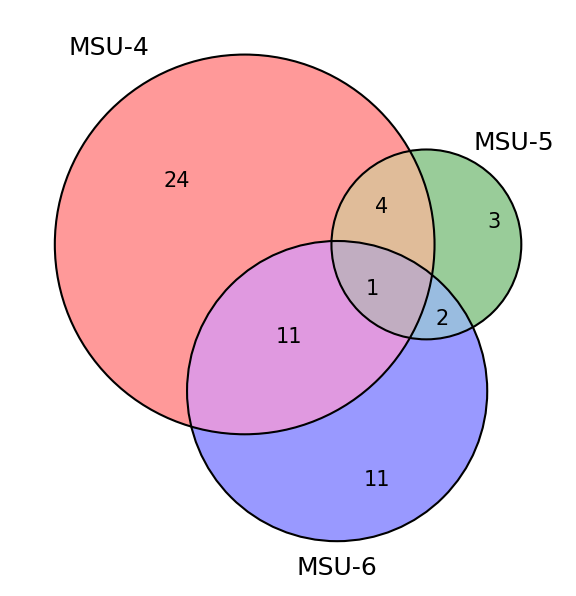

In [595]:
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(5, 5), dpi=150)
venn3([set_msu_4, set_msu_5, set_msu_6], ('MSU-4', 'MSU-5', 'MSU-6'))
venn3_circles([set_msu_4, set_msu_5, set_msu_6], lw=1)
plt.savefig('Venn.png', dpi = 150)

### Common genus is Brevundimonas

In [621]:
data_family

,MSU-4,MSU-5,MSU-6
family,,,
Other,0.080408,0.035926,0.144094
Caulobacteraceae,0.097606,0.191339,0.065079
Comamonadaceae,0.012193,0.022056,0.199702
Devosiaceae,0.007765,0.000000,0.220538
Flavobacteriaceae,0.086440,0.078427,0.000000
Microbacteriaceae,0.043701,0.241262,0.001082
Pseudomonadaceae,0.000000,0.429886,0.002977
Reyranellaceae,0.003529,0.000000,0.060885
Rhizobiaceae,0.161330,0.000636,0.004330


In [642]:
data_family.set_index('family')

,MSU-4,MSU-5,MSU-6
family,,,
Acetobacteraceae,0.000000,0.000000,0.003247
Alcaligenaceae,0.000000,0.000933,0.000000
Amoebophilaceae,0.000128,0.000000,0.015830
Azospirillaceae,0.003080,0.000000,0.000000
Beijerinckiaceae,0.011615,0.000000,0.004194
Brevibacillaceae,0.000000,0.000000,0.000676
Brevibacteriaceae,0.000000,0.001527,0.000000
Caulobacteraceae,0.097606,0.191339,0.065079
Chitinophagaceae,0.001283,0.000000,0.000000


In [643]:
f_set_msu_4 = set(data_family['family'].loc[data_family['MSU-4'] != 0])
f_set_msu_5 = set(data_family['family'].loc[data_family['MSU-5'] != 0])
f_set_msu_6 = set(data_family['family'].loc[data_family['MSU-6'] != 0])

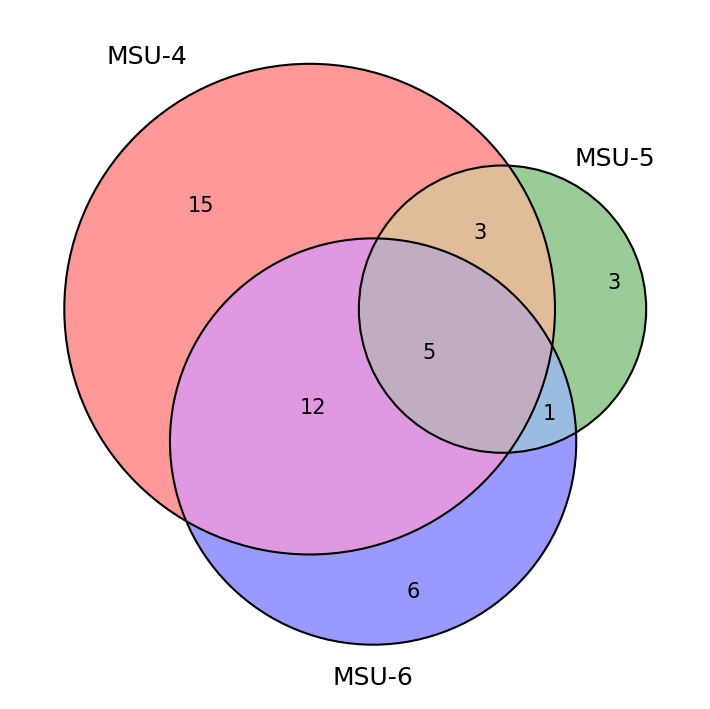

In [644]:
from matplotlib_venn import venn3, venn3_circles
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
venn3([f_set_msu_4, f_set_msu_5, f_set_msu_6], ('MSU-4', 'MSU-5', 'MSU-6'), ax = ax, alpha = 0.4)
venn3_circles([f_set_msu_4, f_set_msu_5, f_set_msu_6], lw=1)
plt.savefig('Venn_f.png', dpi = 150)

Пересечение большое, почти нет одинаковых семейств ==> пробы в целом очень похожи на уровне семейств

In [518]:
test = MH_index_table.copy()

In [522]:
test = test.rename(index={'MSU-4':'1488'})

In [540]:
test

,MSU-4,MSU-5,MSU-6
1488,1.000000,0.152015,0.157300
MSU-5,0.152015,1.000000,0.071881
MSU-6,0.157300,0.071881,1.000000


In [541]:
test.loc['1488'], test.loc['MSU-6'] = test.loc['MSU-6'], test.loc['1488']

In [542]:
test

,MSU-4,MSU-5,MSU-6
1488,0.157300,0.071881,1.000000
MSU-5,0.152015,1.000000,0.071881
MSU-6,0.157300,0.071881,1.000000


In [579]:
(6.63e-34 * 3e8)/480e-9

4.14375e-19

In [580]:
11.2e-3 * 6.02e23

6.7424e+21

In [581]:
6.7424e+21 * 4.14375e-19

2793.882